In [1]:
import numpy as np

data_train = np.load('data_train.npy')
target_train = np.load('target_train.npy')

data_validation = np.load('data_validation.npy')
target_validation = np.load('target_validation.npy')

data_test = np.load('data_test.npy')
target_test = np.load('target_test.npy')

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200, (3, 3), input_shape = data_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [5]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model', 
#                              monitor = 'val_loss', verbose = 0, save_best_only = True, mode = 'auto')
history = model.fit(data_train, target_train, epochs = 2, validation_split = 0.2)

Epoch 1/2
250/250 [==============================] - 224s 896ms/step - loss: 0.2594 - accuracy: 0.8851 - val_loss: 0.2177 - val_accuracy: 0.9175
Epoch 2/2
250/250 [==============================] - 233s 932ms/step - loss: 0.1080 - accuracy: 0.9630 - val_loss: 0.1967 - val_accuracy: 0.9335


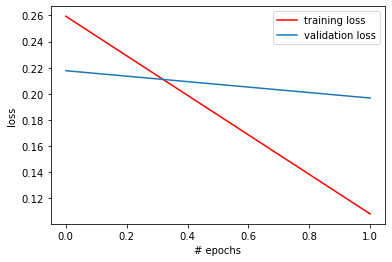

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

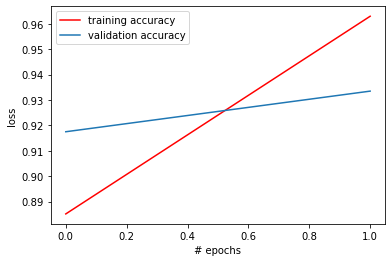

In [7]:
plt.plot(history.history['accuracy'], 'r', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(data_test, target_test))

31/31 [==============================] - 6s 197ms/step - loss: 0.7589 - accuracy: 0.5131
[0.7588989734649658, 0.5131048560142517]


In [9]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
